<a id=top-page></a>
# Cost function assessment of swiss roll data projections with varying hyper-parameters, $r$ and $b$

In this notebook, we explore the effect of the cost function's hyper-parameters $r$ and $b$ on evaluating embeddings generated with various dimensionality reduction and manifold learning techniques. We use the classic swiss roll dataset where the `color` variable is the dependent variable, $\phi$.

The analysis in this notebook is performed in the following steps:

- [Create the dataset](#original)
- Create projections with:
    - [Principal component analysis](#PCA)
    - [Multidimensional scaling](#MDS)
    - [Linear distriminant analysis](#LDA)
    - [Distance metric learning](#DML)
    - [Isomap](#isomap)
    - [Locally linear embedding](#LLE)
    - [Hessian locally linear embedding](#HLLE)
    - [Local tangent space alignment](#LTSA)
    - [t-SNE](#TSNE)
    - [Uniform manifold approximation and projection](#UMAP)
    - [Spectral embedding](#SE)
    - [Autoencoders](#AE)
- [Save the combined costs](#save)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-3.5, 2, 200)
penalty = 'log-sigma-over-peak'
norm = 'max'
colormap = 'coolwarm'
save_figures = False

<a id=original></a>
***
## Create the dataset

[Go to the top](#top-page)

In [3]:
X, color = datasets.make_swiss_roll(n_samples=3000, random_state=random_seed)
color = color[:,None]
(n_observations, n_variables) = np.shape(X)

In [4]:
variance_data = analysis.compute_normalized_variance(X, 
                                                     color, 
                                                     depvar_names=['var'], 
                                                     bandwidth_values=bandwidth_values)

derivative, sigma, _ = analysis.normalized_variance_derivative(variance_data)

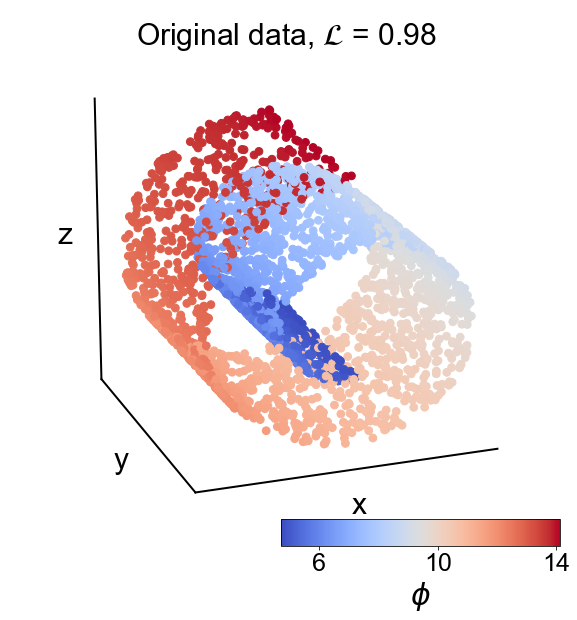

In [7]:
fig = plt.figure(figsize=(10, 10))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
ax = fig.add_subplot(spec[0,0], projection='3d')
scat = ax.scatter(X[:,0], X[:,1], X[:,2], c=color.ravel(), s=60, marker='o', cmap=colormap, alpha=1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.tick_params(pad=5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(elev=20, azim=70)
ax.set_xlabel('x', fontsize=30)
ax.set_ylabel('y', fontsize=30)
ax.set_zlabel('z', fontsize=30)
plt.title('Original data, $\mathcal{L}$ = ' + str(round(cost_3D,2)), fontsize=30)
cbaxes = inset_axes(ax, width="50%", height="5%", loc='lower right')
cbar = plt.colorbar(scat, ticks=[6,10,14], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$\phi$', fontsize=30, rotation=0)
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(2)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(25)

if save_figures: plt.savefig('../figures/swiss-roll-3d.png', dpi=300, bbox_inches='tight')

<a id=PCA></a>
***
## Principal component analysis

[Go to the top](#top-page)

In [8]:
tic = time.perf_counter()

pca = reduction.PCA(X, scaling='auto', n_components=2)
X_PCA = pca.transform(X)

variance_data_PCA = analysis.compute_normalized_variance(X_PCA, 
                                                         color, 
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)

derivative_PCA, sigma_PCA, _ = analysis.normalized_variance_derivative(variance_data_PCA)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


In [10]:
print(cost_PCA)

2.5661063285717773


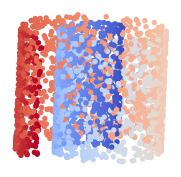

In [11]:
reduction.plot_2d_manifold(X_PCA[:,0], 
                           X_PCA[:,1], 
                           s=30,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=MDS></a>
***
## Multidimensional scaling

[Go to the top](#top-page)

In [12]:
tic = time.perf_counter()

X_MDS = manifold.MDS(n_components=2, random_state=random_seed).fit_transform(X)

variance_data_MDS = analysis.compute_normalized_variance(X_MDS,
                                                         color,
                                                         depvar_names=['var'],
                                                         bandwidth_values=bandwidth_values)

derivative_MDS, sigma_MDS, _ = analysis.normalized_variance_derivative(variance_data_MDS)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 3.7 minutes.
----------------------------------------


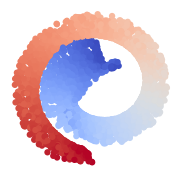

In [15]:
reduction.plot_2d_manifold(X_MDS[:,0], 
                           X_MDS[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=LDA></a>
***
## Linear discriminant analysis

[Go to the top](#top-page)

In [16]:
tic = time.perf_counter()

(idx, borders) = preprocess.variable_bins(color, 5)
X_LDA = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, idx)

variance_data_LDA = analysis.compute_normalized_variance(X_LDA,
                                                         color,
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)

derivative_LDA, sigma_LDA, _ = analysis.normalized_variance_derivative(variance_data_LDA)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


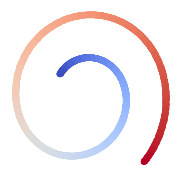

In [19]:
reduction.plot_2d_manifold(X_LDA[:,0], 
                           X_LDA[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=DML></a>
***
## Distance metric learning

[Go to the top](#top-page)

In [62]:
tic = time.perf_counter()

(idx, borders) = preprocess.variable_bins(color, 5)
dml_object = DML_eig()
dml_object.fit(X,idx)
X_DML = dml_object.transform(X)
X_DML = X_DML[:,0:2]

variance_data_DML = analysis.compute_normalized_variance(X_DML, 
                                                         color,
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)

derivative_DML, sigma_DML, _ = analysis.normalized_variance_derivative(variance_data_DML)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 13.0 minutes.
----------------------------------------


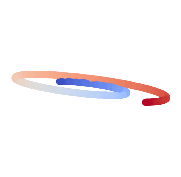

In [63]:
reduction.plot_2d_manifold(X_DML[:,0], 
                           X_DML[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=isomap></a>
***
## Isomap

[Go to the top](#top-page)

In [24]:
tic = time.perf_counter()

X_IMAP = manifold.Isomap(n_components=2).fit_transform(X)

variance_data_IMAP = analysis.compute_normalized_variance(X_IMAP, 
                                                          color, 
                                                          depvar_names=['var'], 
                                                          bandwidth_values=bandwidth_values)

derivative_IMAP, sigma_IMAP, _ = analysis.normalized_variance_derivative(variance_data_IMAP)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


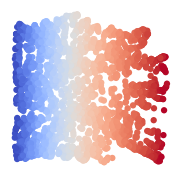

In [27]:
reduction.plot_2d_manifold(X_IMAP[:,0], 
                           X_IMAP[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=LLE></a>
***
## Locally linear embedding

[Go to the top](#top-page)

In [28]:
tic = time.perf_counter()

X_LLE, _ = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2, random_state=random_seed)

variance_data_LLE = analysis.compute_normalized_variance(X_LLE, 
                                                         color, 
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)

derivative_LLE, sigma_LLE, _ = analysis.normalized_variance_derivative(variance_data_LLE)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


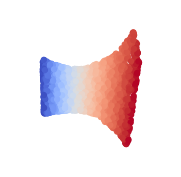

In [31]:
reduction.plot_2d_manifold(X_LLE[:,0], 
                           X_LLE[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=HLLE></a>
***
## Hessian LLE

[Go to the top](#top-page)

In [32]:
tic = time.perf_counter()

X_HLLE, _ = manifold.locally_linear_embedding(X, n_neighbors=12, method='hessian', n_components=2, random_state=random_seed)

variance_data_HLLE = analysis.compute_normalized_variance(X_HLLE, 
                                                          color, 
                                                          depvar_names=['var'], 
                                                          bandwidth_values=bandwidth_values)

derivative_HLLE, sigma_HLLE, _ = analysis.normalized_variance_derivative(variance_data_HLLE)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


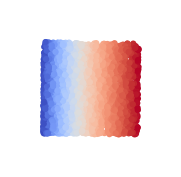

In [35]:
reduction.plot_2d_manifold(X_HLLE[:,0], 
                           X_HLLE[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=LTSA></a>
***
## Local tangent space alignment

[Go to the top](#top-page)

In [36]:
tic = time.perf_counter()

X_LTSA, _ = manifold.locally_linear_embedding(X, n_neighbors=12, method='ltsa', n_components=2, random_state=random_seed)

variance_data_LTSA = analysis.compute_normalized_variance(X_LTSA, 
                                                          color, 
                                                          depvar_names=['var'],
                                                          bandwidth_values=bandwidth_values)

derivative_LTSA, sigma_LTSA, _ = analysis.normalized_variance_derivative(variance_data_LTSA)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


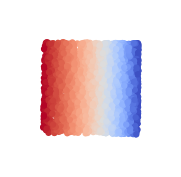

In [39]:
reduction.plot_2d_manifold(X_LTSA[:,0], 
                           X_LTSA[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=TSNE></a>
***
## t-SNE

[Go to the top](#top-page)

In [40]:
tic = time.perf_counter()

X_TSNE = manifold.TSNE(n_components=2, init="random", random_state=random_seed).fit_transform(X)

variance_data_TSNE = analysis.compute_normalized_variance(X_TSNE, 
                                                          color, 
                                                          depvar_names=['var'], 
                                                          bandwidth_values=bandwidth_values)

derivative_TSNE, sigma_TSNE, _ = analysis.normalized_variance_derivative(variance_data_TSNE)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

('WARNING: casting training data as', <class 'float'>)
	Time it took: 0.2 minutes.
----------------------------------------


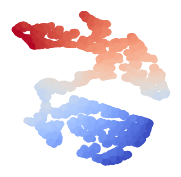

In [43]:
reduction.plot_2d_manifold(X_TSNE[:,0], 
                           X_TSNE[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=UMAP></a>
***
## Uniform manifold approximation and projection

[Go to the top](#top-page)

In [44]:
tic = time.perf_counter()

X_UMAP = umap.UMAP(n_components=2, random_state=random_seed).fit_transform(X)

variance_data_UMAP = analysis.compute_normalized_variance(X_UMAP, 
                                                          color, 
                                                          depvar_names=['var'], 
                                                          bandwidth_values=bandwidth_values)

derivative_UMAP, sigma_UMAP, _ = analysis.normalized_variance_derivative(variance_data_UMAP)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

('WARNING: casting training data as', <class 'float'>)
	Time it took: 0.3 minutes.
----------------------------------------


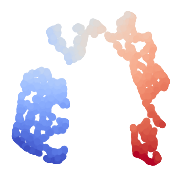

In [47]:
reduction.plot_2d_manifold(X_UMAP[:,0],
                           X_UMAP[:,1],
                           s=40,
                           color=color,
                           clean=True,
                           figure_size=(3,3),
                           color_map=colormap);

<a id=SE></a>
***
## Spectral embedding

[Go to the top](#top-page)

In [48]:
tic = time.perf_counter()

X_SE = manifold.SpectralEmbedding(n_components=2, n_neighbors=12, random_state=random_seed).fit_transform(X)

variance_data_SE = analysis.compute_normalized_variance(X_SE, 
                                                        color, 
                                                        depvar_names=['var'], 
                                                        bandwidth_values=bandwidth_values)

derivative_SE, sigma_SE, _ = analysis.normalized_variance_derivative(variance_data_SE)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.1 minutes.
----------------------------------------


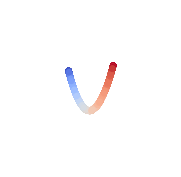

In [51]:
reduction.plot_2d_manifold(X_SE[:,0], 
                           X_SE[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=AE></a>
***
## Autoencoders

[Go to the top](#top-page)

In [52]:
tic = time.perf_counter()

tf.random.set_seed(random_seed)

X_CS, _, _ = preprocess.center_scale(X, scaling='auto')

sample_random = preprocess.DataSampler(np.zeros((n_observations,)).astype(int), random_seed=random_seed, verbose=False)
(idx_train, idx_test) = sample_random.random(80)
X_CS_train = X_CS[idx_train,:]
X_CS_test = X_CS[idx_test,:]

input_X = keras.Input(shape=(3,))
encoded_1 = layers.Dense(2, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros')(input_X)
decoded = layers.Dense(3, activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros')(encoded_1)
autoencoder = keras.Model(input_X, decoded)
encoder = keras.Model(input_X, encoded_1)
encoded_input = keras.Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
autoencoder.fit(X_CS_train, X_CS_train,
                epochs=200,
                batch_size=50,
                shuffle=True,
                validation_data=(X_CS_test, X_CS_test), 
                verbose=0)

X_AE = encoder.predict(X_CS)

variance_data_AE = analysis.compute_normalized_variance(X_AE, 
                                                        color, 
                                                        depvar_names=['var'], 
                                                        bandwidth_values=bandwidth_values)

derivative_AE, sigma_AE, _ = analysis.normalized_variance_derivative(variance_data_AE)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

('WARNING: casting training data as', <class 'float'>)
	Time it took: 0.2 minutes.
----------------------------------------


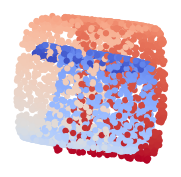

In [55]:
reduction.plot_2d_manifold(X_AE[:,0], 
                           X_AE[:,1], 
                           s=40,
                           color=color, 
                           clean=True,
                           figure_size=(3,3), 
                           color_map=colormap);

<a id=save></a>
***

## Save the combined costs for varying hyper-parameters

[Go to the top](#top-page)

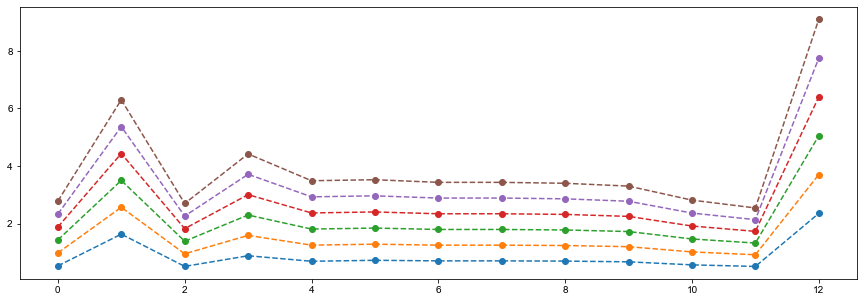

In [65]:
powers_list = [0.5,1,1.5,2,2.5,3]
vertical_shifts_list = [0.5,1,1.5,2,2.5,3]

power = 1

fig = plt.figure(figsize=(15,5))

for vertical_shift in vertical_shifts_list:

    cost_3D = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                penalty_function=penalty, 
                                                                power=power,
                                                                vertical_shift=vertical_shift,
                                                                norm=norm, 
                                                                integrate_to_peak=False)
    
    cost_PCA = analysis.cost_function_normalized_variance_derivative(variance_data_PCA, 
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 vertical_shift=vertical_shift,
                                                                 norm=norm, 
                                                                 integrate_to_peak=False)
    
    cost_MDS = analysis.cost_function_normalized_variance_derivative(variance_data_MDS,
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 vertical_shift=vertical_shift,
                                                                 norm=norm,
                                                                 integrate_to_peak=False)
    
    cost_LDA = analysis.cost_function_normalized_variance_derivative(variance_data_LDA, 
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 vertical_shift=vertical_shift,
                                                                 norm=norm, 
                                                                 integrate_to_peak=False)
    
    cost_DML = analysis.cost_function_normalized_variance_derivative(variance_data_DML, 
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 vertical_shift=vertical_shift,
                                                                 norm=norm, 
                                                                 integrate_to_peak=False)
    
    cost_IMAP = analysis.cost_function_normalized_variance_derivative(variance_data_IMAP, 
                                                                  penalty_function=penalty,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  norm=norm, 
                                                                  integrate_to_peak=False)
    
    cost_LLE = analysis.cost_function_normalized_variance_derivative(variance_data_LLE,
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 vertical_shift=vertical_shift,
                                                                 norm=norm,
                                                                 integrate_to_peak=False)
    
    cost_HLLE = analysis.cost_function_normalized_variance_derivative(variance_data_HLLE,
                                                                  penalty_function=penalty,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  norm=norm, 
                                                                  integrate_to_peak=False)
    
    cost_LTSA = analysis.cost_function_normalized_variance_derivative(variance_data_LTSA, 
                                                                  penalty_function=penalty,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  norm=norm, 
                                                                  integrate_to_peak=False)

    cost_TSNE = analysis.cost_function_normalized_variance_derivative(variance_data_TSNE,
                                                                      penalty_function=penalty,
                                                                      power=power,
                                                                      vertical_shift=vertical_shift,
                                                                      norm=norm,
                                                                      integrate_to_peak=False)

    cost_UMAP = analysis.cost_function_normalized_variance_derivative(variance_data_UMAP, 
                                                                      penalty_function=penalty,
                                                                      power=power,
                                                                      vertical_shift=vertical_shift,
                                                                      norm=norm, 
                                                                      integrate_to_peak=False)

    cost_SE = analysis.cost_function_normalized_variance_derivative(variance_data_SE, 
                                                                    penalty_function=penalty,
                                                                    power=power,
                                                                    vertical_shift=vertical_shift,
                                                                    norm=norm, 
                                                                    integrate_to_peak=False)

    cost_AE = analysis.cost_function_normalized_variance_derivative(variance_data_AE, 
                                                                    penalty_function=penalty, 
                                                                    power=power,
                                                                    vertical_shift=vertical_shift,
                                                                    norm=norm, 
                                                                    integrate_to_peak=False)

    costs = [cost_3D, cost_PCA, cost_LDA, cost_DML, cost_MDS, cost_LLE, cost_HLLE, cost_LTSA, cost_IMAP, cost_TSNE, cost_UMAP, cost_SE, cost_AE]
    np.savetxt('swiss-roll-costs-r-' + str(power) + '-b-' + str(vertical_shift) + '.csv', (costs), delimiter=',', fmt='%.16e')
    
    plt.plot(np.arange(0,len(costs)), costs, 'o--')

In [3]:
x_labels = ['3D', 'PCA', 'LDA', 'DML', 'MDS', 'LLE', 'H-LLE', 'LTSA', 'Isomap', 't-SNE', 'UMAP', 'SE', 'AE']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

b = 0.5
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, MDS, Isomap, LTSA, H-LLE, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
4.6

b = 1
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
4.0

b = 1.5
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
3.8

b = 2
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
3.7

b = 2.5
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
3.6

b = 3
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
3.6



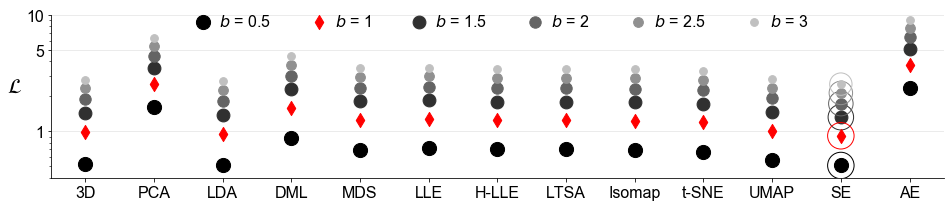

In [57]:
fig = plt.figure(figsize=(16, 3))
fig.tight_layout(pad=-30)
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
x_range = np.array([i for i in range(0,13)])
ax = fig.add_subplot(spec[0,0])
powers_list = [0.5,1,1.5,2,2.5,3]
vertical_shifts_list = [0.5,1,1.5,2,2.5,3]
power = 1

color_map_colors = cm.get_cmap('Greys')
colors = np.flipud(color_map_colors(np.linspace(0.2, 1, len(vertical_shifts_list))))

i = 0

for vertical_shift in vertical_shifts_list:
    costs = pd.read_csv('../results/swiss-roll-costs-r-1-b-' + str(vertical_shift) + '.csv', sep = ',', header=None).to_numpy()

    (best_idx, _) = np.where(costs==np.min(costs[1::]))
    best_idx = int(best_idx[0])
    
    (_, idx) = preprocess.order_variables(costs.T, method='max', descending=False)
    
    print('b = ' + str(vertical_shift))
    print('Manifolds ordered from best to worst:')
    print(', '.join(np.array(x_labels)[idx]))
    print('Ratio of AE cost to SE cost:')
    print(round(costs[-1,0]/costs[-2,0],1))
    print()
    
    if vertical_shift==1:
        plt.scatter(x_range, costs, c='r', marker='d', s=100, linewidths=1, label='$b$ = ' + str(vertical_shift), zorder=100)
        plt.scatter(x_range[best_idx], costs[best_idx], marker='o', facecolors='none', edgecolors='r', s=700, zorder=100)
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=200-35*i, label='$b$ = ' + str(vertical_shift), zorder=10)
        plt.scatter(x_range[best_idx], costs[best_idx], marker='o', facecolors='none', edgecolors=colors[i], s=700-50*i, zorder=10)
        i+=1
        
plt.xticks(x_range, x_labels, fontsize=16)
plt.grid(alpha=0.3, zorder=1)
plt.xlim([-0.5,len(x_labels)-0.5])
plt.yticks(fontsize=16)
plt.ylim([0.4,10])
ax.set_yscale('log')
ax.set_yticks([1,5,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.legend(frameon=False, ncol=6, loc='upper center', fontsize=16, bbox_to_anchor=(0.5,1.1), handletextpad=0)

plt.savefig('../figures/swiss-roll-effect-of-increasing-hyper-parameter-b.svg', dpi=200, bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

r = 0.5
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, MDS, LTSA, H-LLE, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
3.7

r = 1
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
4.0

r = 1.5
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
4.3

r = 2
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
4.5

r = 2.5
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
4.7

r = 3
Manifolds ordered from best to worst:
SE, LDA, 3D, UMAP, t-SNE, Isomap, LTSA, H-LLE, MDS, LLE, DML, PCA, AE
Ratio of AE cost to SE cost:
5.0



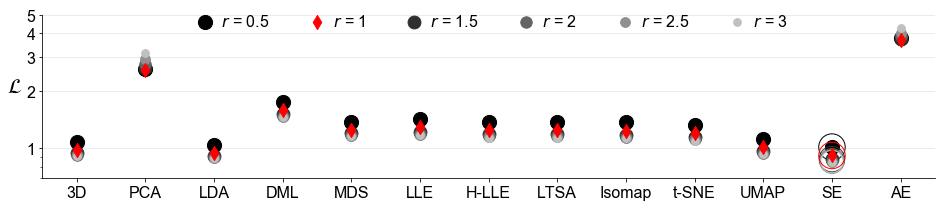

In [56]:
fig = plt.figure(figsize=(16, 3))
fig.tight_layout(pad=-30)
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
x_range = np.array([i for i in range(0,13)])
ax = fig.add_subplot(spec[0,0])
powers_list = [0.5,1,1.5,2,2.5,3]
vertical_shifts_list = [0.5,1,1.5,2,2.5,3]
vertical_shift = 1

color_map_colors = cm.get_cmap('Greys')
colors = np.flipud(color_map_colors(np.linspace(0.2, 1, len(powers_list))))

i = 0

for power in powers_list:
    costs = pd.read_csv('../results/swiss-roll-costs-r-' + str(power) + '-b-1.csv', sep = ',', header=None).to_numpy()
    
    (best_idx, _) = np.where(costs==np.min(costs[1::]))
    best_idx = int(best_idx[0]) 
        
    (_, idx) = preprocess.order_variables(costs.T, method='max', descending=False)
    
    print('r = ' + str(power))
    print('Manifolds ordered from best to worst:')
    print(', '.join(np.array(x_labels)[idx]))
    print('Ratio of AE cost to SE cost:')
    print(round(costs[-1,0]/costs[-2,0],1))
    print()
    
    if power==1:
        plt.scatter(x_range, costs, c='r', marker='d', s=100, linewidths=1, label='$r$ = ' + str(power), zorder=100)
        plt.scatter(x_range[best_idx], costs[best_idx], marker='o', facecolors='none', edgecolors='r', s=700, zorder=100)
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=200-35*i, label='$r$ = ' + str(power), zorder=10)
        plt.scatter(x_range[best_idx], costs[best_idx], marker='o', facecolors='none', edgecolors=colors[i], s=700-50*i, zorder=10)
        i+=1
        
plt.xticks(x_range, x_labels, fontsize=16)
plt.grid(alpha=0.3, zorder=1)
plt.xlim([-0.5,len(x_labels)-0.5])
ax.set_yscale('log')
ax.set_yticks([1,2,3,4,5])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.yticks(fontsize=16)
plt.ylim([0.7,5])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.legend(frameon=False, ncol=6, loc='upper center', fontsize=16, bbox_to_anchor=(0.5,1.1), handletextpad=0)

plt.savefig('../figures/swiss-roll-effect-of-increasing-hyper-parameter-r.svg', dpi=200, bbox_inches='tight')

***